<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/19_Fuzzy_logic_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


150
5
Gatunki:  ['setosa' 'versicolor' 'virginica']
Rozkład:  species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


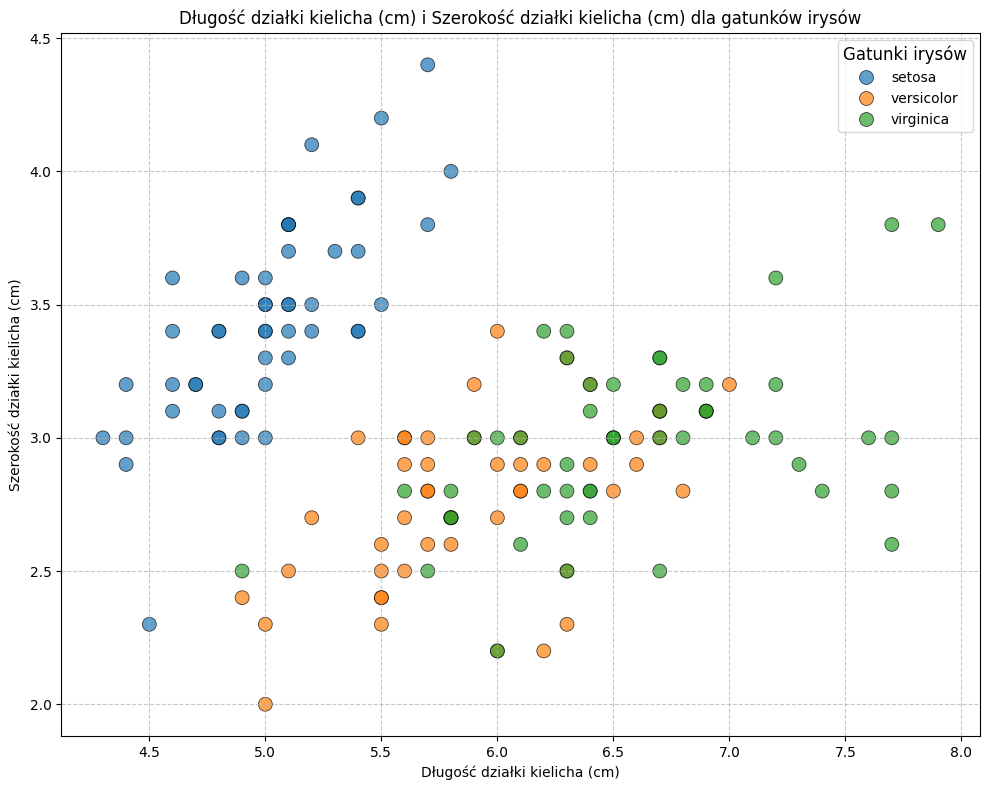

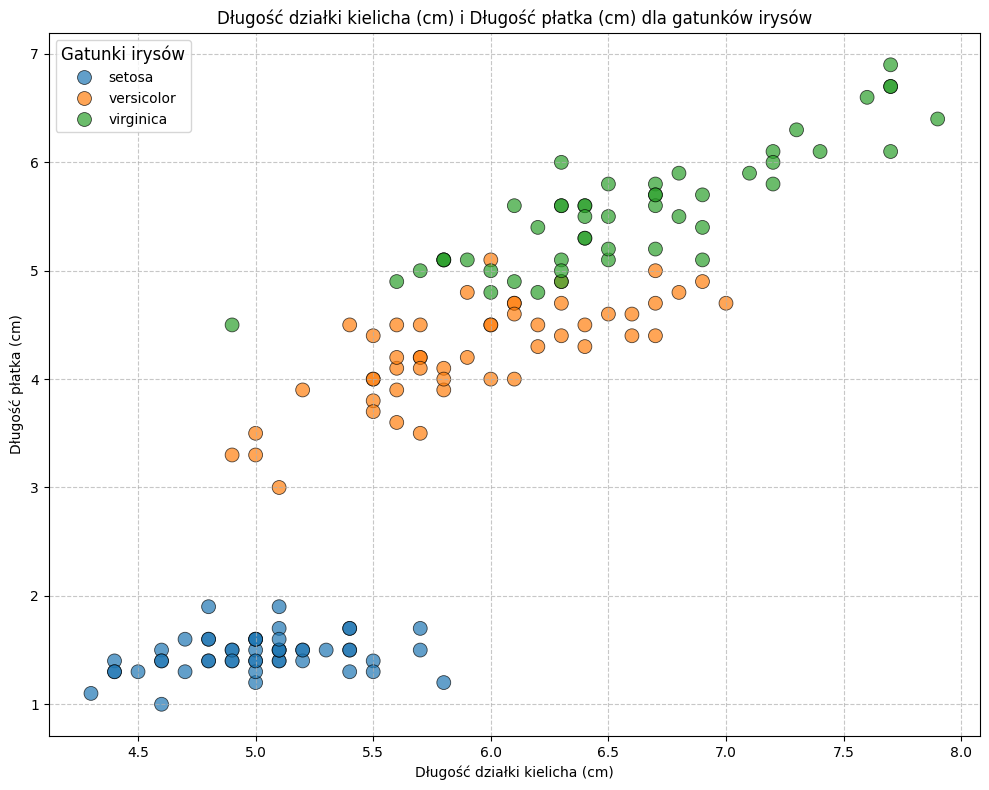

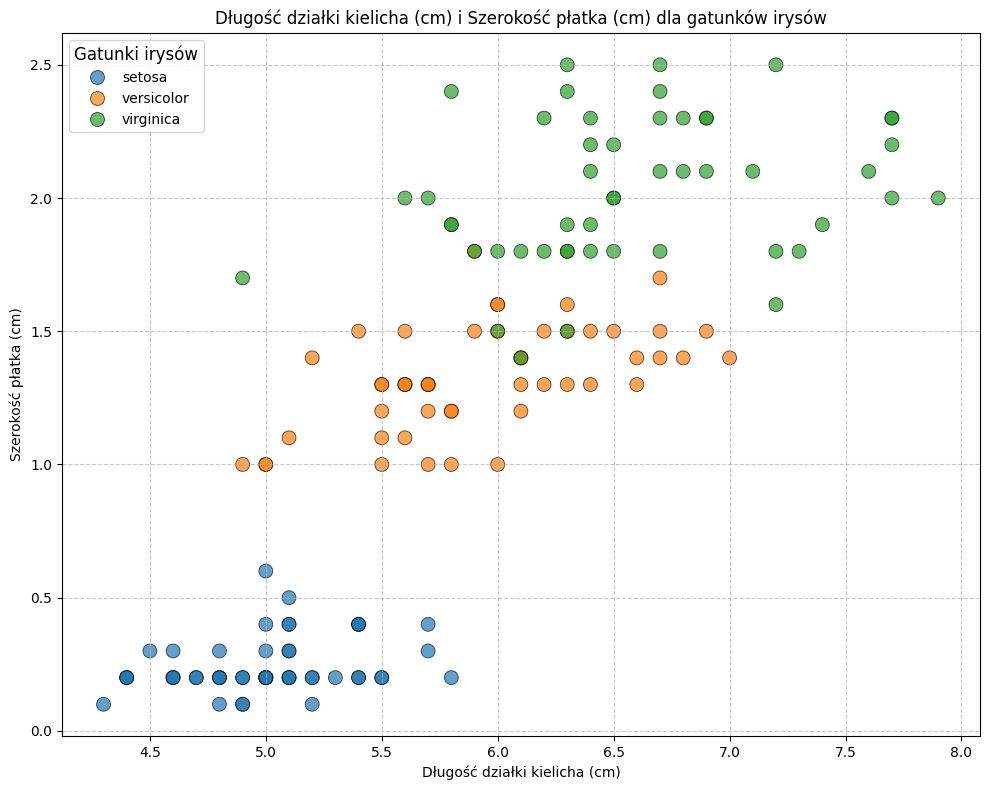

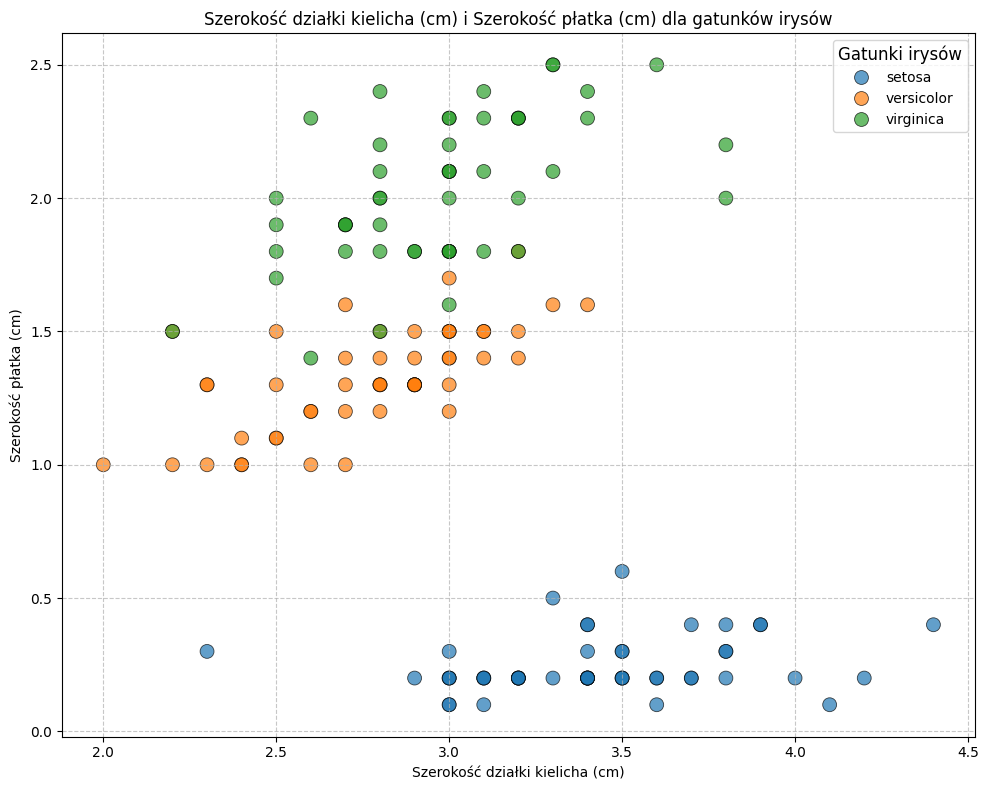

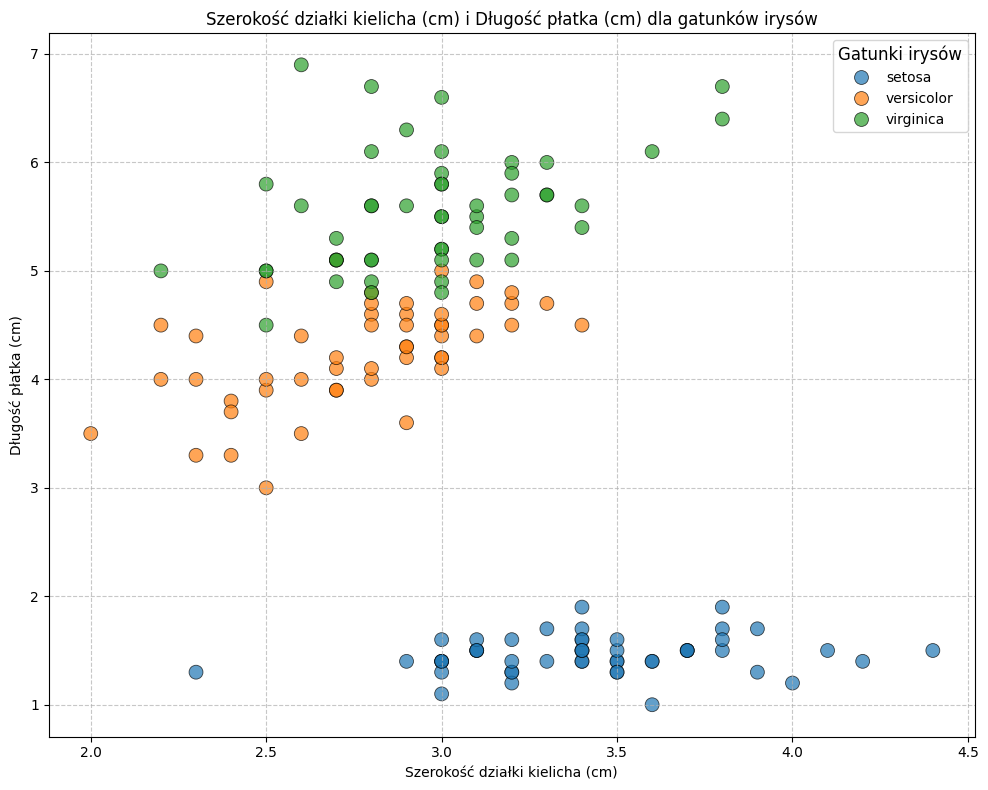

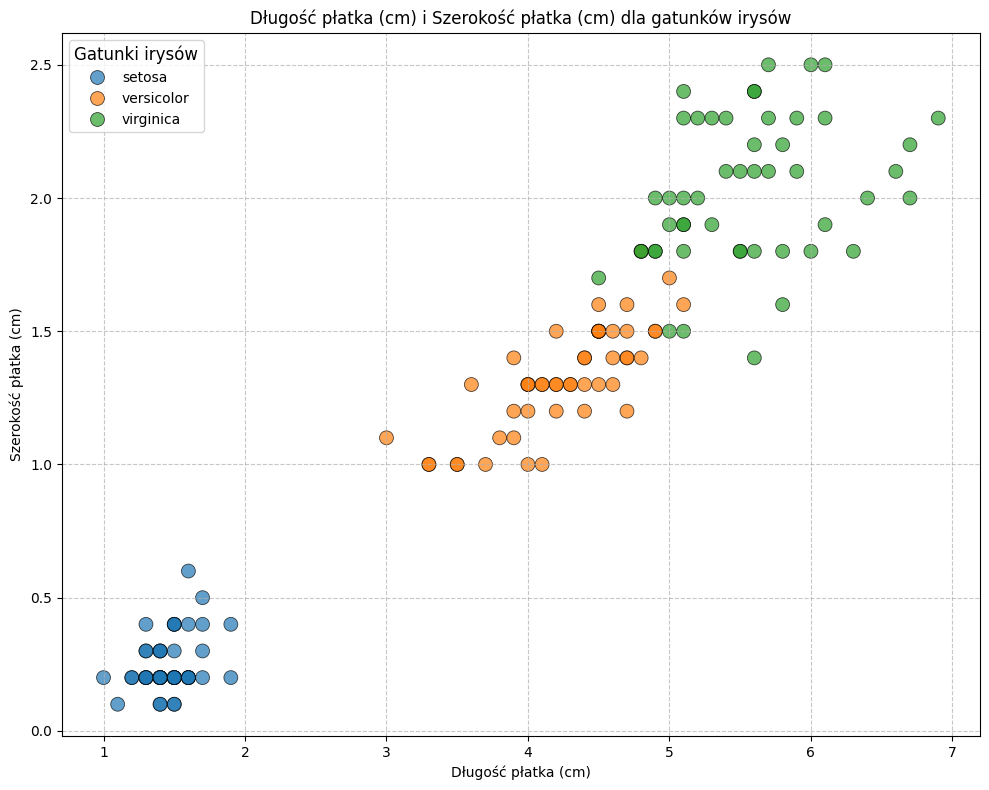

In [ ]:
# Sekcja 1: Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import math

df = sns.load_dataset('iris')
df.head(2)

print(len(df))
print(len(df.columns))
print("Gatunki: ", df['species'].unique())
print("Rozkład: ", df['species'].value_counts())

# Nowe pary cech (zgodne z seaborn)
feature_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width', 'petal_width'),
    ('sepal_width', 'petal_length'),
    ('petal_length', 'petal_width')
]

# Polskie nazwy cech
feature_names_pl = {
    'sepal_length': 'Długość działki kielicha (cm)',
    'sepal_width': 'Szerokość działki kielicha (cm)',
    'petal_length': 'Długość płatka (cm)',
    'petal_width': 'Szerokość płatka (cm)'
}

for x_feature, y_feature in feature_pairs:
  plt.figure(figsize=(10, 8))

  scatter = sns.scatterplot(
      data=df,
      x=x_feature,
      y=y_feature,
      hue='species',
      s=100,
      alpha=0.7,
      edgecolor='black',
      linewidth=0.6,
  )

  x_name_pl = feature_names_pl[x_feature]
  y_name_pl = feature_names_pl[y_feature]

  plt.title(f"{x_name_pl} i {y_name_pl} dla gatunków irysów")
  plt.xlabel(x_name_pl)
  plt.ylabel(y_name_pl)

  plt.legend(title="Gatunki irysów", fontsize=10, title_fontsize=12)
  plt.grid(True, linestyle="--", alpha=0.7)
  plt.tight_layout()
  plt.show()


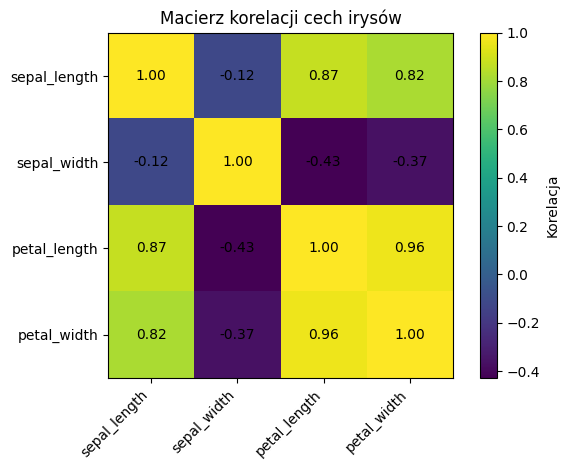

<ipython-input-4-cfbfdb2b11c7>:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=species)


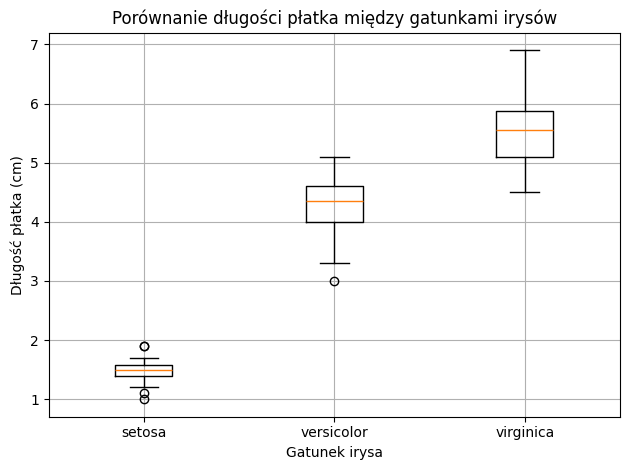

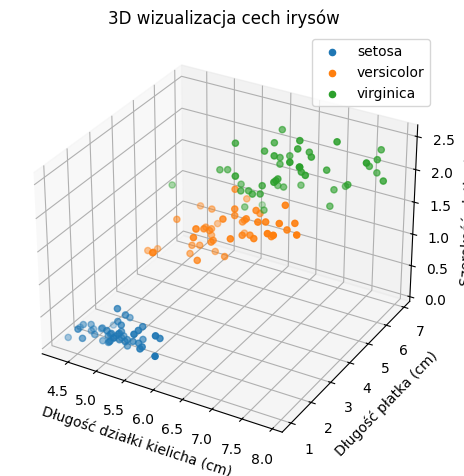

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Load the Iris dataset locally (no internet needed)
iris_bunch = load_iris(as_frame=True)
df = iris_bunch.frame
# Add human‑readable species names
df['species'] = df['target'].map(dict(enumerate(iris_bunch.target_names)))
# Rename feature columns to match common naming
df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
}, inplace=True)

# --- Plot 1: Correlation heatmap ---
fig1 = plt.figure()
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
plt.imshow(corr, interpolation='nearest')
plt.title('Macierz korelacji cech irysów')
plt.xticks(range(4), ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], rotation=45, ha='right')
plt.yticks(range(4), ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
for i in range(4):
    for j in range(4):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center')
plt.colorbar(label='Korelacja')
plt.tight_layout()
plt.show()

# --- Plot 2: Boxplot of petal length by species ---
fig2 = plt.figure()
species = df['species'].unique()
data = [df[df['species'] == sp]['petal_length'] for sp in species]
plt.boxplot(data, labels=species)
plt.xlabel('Gatunek irysa')
plt.ylabel('Długość płatka (cm)')
plt.title('Porównanie długości płatka między gatunkami irysów')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 3: 3D scatter plot ---
fig3 = plt.figure()
ax = fig3.add_subplot(111, projection='3d')
for sp in species:
    subset = df[df['species'] == sp]
    ax.scatter(subset['sepal_length'], subset['petal_length'], subset['petal_width'], label=sp)
ax.set_xlabel('Długość działki kielicha (cm)')
ax.set_ylabel('Długość płatka (cm)')
ax.set_zlabel('Szerokość płatka (cm)')
ax.set_title('3D wizualizacja cech irysów')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)

# Lista cech
features = [
    "petal length (cm)",
    "petal width (cm)"
]

# Gatunki
species = iris.target_names

# Tworzenie tabeli wyników
results = []
for feature in features:
    for specie in species:
        data = df_test[df_test['species'] == specie][feature]
        results.append({
            "Feature": feature,
            "Species": specie,
            "Minimum": 0.8 * data.min(),
            "Maximum": 1.2 * data.max(),
            "Mean": data.mean()
        })

# DataFrame z wynikami
summary_df = pd.DataFrame(results)

# Wyświetlenie tabeli
print(summary_df)

             Feature     Species  Minimum  Maximum      Mean
0  petal length (cm)      setosa     1.04     2.04  1.500000
1  petal length (cm)  versicolor     3.12     6.00  4.383333
2  petal length (cm)   virginica     3.92     8.28  5.653846
3   petal width (cm)      setosa     0.08     0.48  0.263636
4   petal width (cm)  versicolor     0.80     2.04  1.283333
5   petal width (cm)   virginica     1.44     2.76  2.061538


In [ ]:
# Logika rozmyta – klasyfikacja Iris (wersja poprawiona)

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# 1. Dane -----------------------------------------------------------
iris     = load_iris()
X_test   = iris.data                 # 150 × 4
y_test   = iris.target               # klasy 0-1-2

# 2. Zmienne rozmyte -------------------------------------------------
#    Zakresy ustawiamy tak, aby **obejmowały PEŁNE** M-ki z punktu 3.
sepal_length = ctrl.Antecedent(np.linspace(4.0, 8.0, 1000), 'sepal_length')
sepal_width  = ctrl.Antecedent(np.linspace(2.0, 4.5, 1000), 'sepal_width')
petal_length = ctrl.Antecedent(np.linspace(0.5, 8.5, 1000), 'petal_length')  # <- poszerzony
petal_width  = ctrl.Antecedent(np.linspace(0.0, 2.5, 1000), 'petal_width')   # <- zaczyna od 0

species = ctrl.Consequent(np.linspace(0, 2, 1000), 'species')                # 1000 pkt

# 3. Funkcje przynależności -----------------------------------------
#    (dokładnie te same, ale teraz M-ki mieszczą się w universe)

petal_length['setosa']     = fuzz.trimf(petal_length.universe, [0.8, 1.45, 2.44])
petal_length['versicolor'] = fuzz.trimf(petal_length.universe, [2.44, 4.40, 5.76])
petal_length['virginica']  = fuzz.trimf(petal_length.universe, [3.92, 5.57, 8.28])

petal_width['setosa']      = fuzz.trimf(petal_width.universe, [0.08, 0.24, 0.66])
petal_width['versicolor']  = fuzz.trimf(petal_width.universe, [0.66, 1.39, 1.92])
petal_width['virginica']   = fuzz.trimf(petal_width.universe, [1.44, 2.08, 2.76])

species['setosa']     = fuzz.trimf(species.universe, [0.0, 0.0, 0.5])
species['versicolor'] = fuzz.trimf(species.universe, [0.5, 1.0, 1.5])
species['virginica']  = fuzz.trimf(species.universe, [1.5, 2.0, 2.0])

# 4. Reguły ----------------------------------------------------------
rule1 = ctrl.Rule(petal_length['setosa']     & petal_width['setosa'],
                  species['setosa'])
rule2 = ctrl.Rule(petal_length['versicolor'] & petal_width['versicolor'],
                  species['versicolor'])
rule3 = ctrl.Rule(petal_length['virginica']  & petal_width['virginica'],
                  species['virginica'])

species_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# 5. Symulacja -------------------------------------------------------
y_pred = []
for sl, sw, pl, pw in X_test:                 # iterujemy po wszystkich 150 kwiatach
    sim = ctrl.ControlSystemSimulation(species_ctrl)
    sim.input['petal_length'] = pl
    sim.input['petal_width']  = pw
    sim.compute()

    crisp = sim.output['species']             # teraz klucz *zawsze* istnieje
    if   crisp < 0.5:  y_pred.append(0)
    elif crisp < 1.5:  y_pred.append(1)
    else:              y_pred.append(2)

# 6. Raport ----------------------------------------------------------
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.82      1.00      0.90        50
   virginica       1.00      0.78      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

